In [1]:
import numpy as np
import utils.molecule_tools as mol
import utils.cs_vqe_tools as cs_tools
import cs_vqe_classes.cs_vqe_circuit as cs_circ
from qiskit.aqua.components.optimizers import (SLSQP, COBYLA, SPSA, AQGD, L_BFGS_B, P_BFGS,
                                                NELDER_MEAD, CG, ADAM, POWELL, TNC, GSLS,
                                                NFT, IMFIL, SNOBFIT)

/home/tim/anaconda3/lib/python3.7/site-packages/qiskit/aqua/components/optimizers/optimizer.py:50: DeprecationWarning: The package qiskit.aqua.components.optimizers is deprecated. It was moved/refactored to qiskit.algorithms.optimizers (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/master/README.md#migration-guide>
  'qiskit.algorithms.optimizers', 'qiskit-terra')


In [2]:
atoms = ['He','H']
bond_len = 0.772 #BeH:1.342396
multiplicity = 1
charge = 1
basis = '3-21g'

molecule = mol.construct_molecule(atoms, bond_len, multiplicity, charge, basis)
speciesname = molecule['speciesname']
ham   = molecule['hamiltonian']
uccsd = molecule['uccsdansatz']
num_qubits = molecule['num_qubits']
num_electrons = molecule['num_electrons']

In [83]:
optimisers = [CG,COBYLA,GSLS,IMFIL,L_BFGS_B,NELDER_MEAD,NFT,POWELL,SNOBFIT,SLSQP,SPSA,TNC]

In [4]:
terms_noncon = cs_tools.greedy_dfs(ham, 3, criterion='weight')[-1]
mol_circ = cs_circ.cs_vqe_circuit(hamiltonian=ham,
                                  terms_noncon=terms_noncon,
                                  num_qubits=num_qubits,
                                  num_electrons=num_electrons, 
                                  rot_A=True)

In [5]:
mol_circ.run_cs_vqe(max_sim_q=4, optimizer=IMFIL(maxiter=10000))
mol_circ.cs_vqe_results

/home/tim/anaconda3/lib/python3.7/site-packages/qiskit/circuit/quantumcircuit.py:876: DeprecationWarning: The QuantumCircuit.extend() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  return self.extend(rhs)
/home/tim/anaconda3/lib/python3.7/site-packages/scipy/sparse/linalg/eigen/arpack/arpack.py:1268: RuntimeWarning: k >= N - 1 for N * N square matrix. Attempting to use scipy.linalg.eig instead.
  RuntimeWarning)


*Performing 1-qubit CS-VQE over qubit positions 1
Reached CS-VQE target energy
 
*Performing 2-qubit CS-VQE over qubit positions 1, 0
Reached CS-VQE target energy
 
*Performing 3-qubit CS-VQE over qubit positions 2, 1, 0
Reached CS-VQE target energy
 
*Performing 4-qubit CS-VQE over qubit positions 6, 2, 1, 0
Reached CS-VQE target energy
 


{'rows': 2,
 'cols': 2,
 'grid_pos': [(0, 0), (0, 1), (1, 0), (1, 1)],
 'gs_noncon_energy': -3.1428247492681787,
 'true_gs': -3.166765477254407,
 'num_qubits': 8,
 (0, 0): {'num_sim_q': 1,
  'result': -3.1428247492681782,
  'target': -3.1428247492681782,
  'projected_target': -3.1428247492681782,
  'A_expct': -1.0,
  'counts': [1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   30,
   31,
   32,
   33,
   34,
   35,
   36,
   37,
   38,
   39,
   40,
   41,
   42],
  'values': [-0.5718973898574953,
   -3.1428247492681782,
   -3.1428247492681782,
   -3.1428247492681782,
   -3.1428247492681782,
   -3.1428247492681782,
   -3.1428247492681782,
   -1.857361098745704,
   -1.857361098745704,
   -1.8573610403799696,
   -1.85736104037997,
   -1.85736104037997,
   -2.7663211750868992,
   -2.7663211750868992,
   -2.7663211338160925,
   -2.7663211338160925,

In [6]:
max_sim_q = 8
iters=3
opt_results={}
for opt in optimisers:
    name_index = str(opt).rfind('.')
    opt_name = str(opt)[name_index+1:-2]
    print('Testing optimiser:', opt_name)
    iter_avg_val = np.zeros(max_sim_q)
    iter_avg_cnt = np.zeros(max_sim_q)
    for i in range(iters):
        mol_circ.run_cs_vqe(max_sim_q=max_sim_q, optimizer=opt(maxiter=10000))#, noise=True)
        cs_vqe_results = mol_circ.cs_vqe_results
        count_list = []
        value_list = []
        target_list = []
        for g in cs_vqe_results['grid_pos']:
            vqe_out = cs_vqe_results[g]
            n_q = vqe_out['num_sim_q']
            count_list.append(vqe_out['counts'][-1])
            value_list.append(vqe_out['result'])
            target_list.append(vqe_out['target'])
        
        iter_avg_val += np.array(value_list)
        iter_avg_cnt += np.array(count_list)

            
    opt_results[opt_name] = {'counts': list(iter_avg_cnt/iters),
                             'values': list(iter_avg_val/iters),
                             'target': target_list}

Testing optimiser: CG
*Performing 1-qubit CS-VQE over qubit positions 1
 
*Performing 2-qubit CS-VQE over qubit positions 1, 0


/home/tim/anaconda3/lib/python3.7/site-packages/scipy/sparse/linalg/eigen/arpack/arpack.py:1268: RuntimeWarning: k >= N - 1 for N * N square matrix. Attempting to use scipy.linalg.eig instead.
  RuntimeWarning)


Reached CS-VQE target energy
 
*Performing 3-qubit CS-VQE over qubit positions 2, 1, 0
Reached CS-VQE target energy
 
*Performing 4-qubit CS-VQE over qubit positions 6, 2, 1, 0
Reached CS-VQE target energy
 
*Performing 5-qubit CS-VQE over qubit positions 6, 4, 2, 1, 0
 
*Performing 6-qubit CS-VQE over qubit positions 7, 6, 4, 2, 1, 0
 
*Performing 7-qubit CS-VQE over qubit positions 7, 6, 4, 3, 2, 1, 0
 
*Performing 8-qubit CS-VQE over qubit positions 7, 6, 5, 4, 3, 2, 1, 0
 
*Performing 1-qubit CS-VQE over qubit positions 1
 
*Performing 2-qubit CS-VQE over qubit positions 1, 0


/home/tim/anaconda3/lib/python3.7/site-packages/scipy/sparse/linalg/eigen/arpack/arpack.py:1268: RuntimeWarning: k >= N - 1 for N * N square matrix. Attempting to use scipy.linalg.eig instead.
  RuntimeWarning)


Reached CS-VQE target energy
 
*Performing 3-qubit CS-VQE over qubit positions 2, 1, 0
Reached CS-VQE target energy
 
*Performing 4-qubit CS-VQE over qubit positions 6, 2, 1, 0
Reached CS-VQE target energy
 
*Performing 5-qubit CS-VQE over qubit positions 6, 4, 2, 1, 0
 
*Performing 6-qubit CS-VQE over qubit positions 7, 6, 4, 2, 1, 0
 
*Performing 7-qubit CS-VQE over qubit positions 7, 6, 4, 3, 2, 1, 0
 
*Performing 8-qubit CS-VQE over qubit positions 7, 6, 5, 4, 3, 2, 1, 0
 
*Performing 1-qubit CS-VQE over qubit positions 1
 
*Performing 2-qubit CS-VQE over qubit positions 1, 0


/home/tim/anaconda3/lib/python3.7/site-packages/scipy/sparse/linalg/eigen/arpack/arpack.py:1268: RuntimeWarning: k >= N - 1 for N * N square matrix. Attempting to use scipy.linalg.eig instead.
  RuntimeWarning)


Reached CS-VQE target energy
 
*Performing 3-qubit CS-VQE over qubit positions 2, 1, 0
Reached CS-VQE target energy
 
*Performing 4-qubit CS-VQE over qubit positions 6, 2, 1, 0
Reached CS-VQE target energy
 
*Performing 5-qubit CS-VQE over qubit positions 6, 4, 2, 1, 0
 
*Performing 6-qubit CS-VQE over qubit positions 7, 6, 4, 2, 1, 0
 
*Performing 7-qubit CS-VQE over qubit positions 7, 6, 4, 3, 2, 1, 0
 
*Performing 8-qubit CS-VQE over qubit positions 7, 6, 5, 4, 3, 2, 1, 0
 
Testing optimiser: COBYLA
*Performing 1-qubit CS-VQE over qubit positions 1
Reached CS-VQE target energy
 
*Performing 2-qubit CS-VQE over qubit positions 1, 0


/home/tim/anaconda3/lib/python3.7/site-packages/scipy/sparse/linalg/eigen/arpack/arpack.py:1268: RuntimeWarning: k >= N - 1 for N * N square matrix. Attempting to use scipy.linalg.eig instead.
  RuntimeWarning)


Reached CS-VQE target energy
 
*Performing 3-qubit CS-VQE over qubit positions 2, 1, 0
Reached CS-VQE target energy
 
*Performing 4-qubit CS-VQE over qubit positions 6, 2, 1, 0
 
*Performing 5-qubit CS-VQE over qubit positions 6, 4, 2, 1, 0
 
*Performing 6-qubit CS-VQE over qubit positions 7, 6, 4, 2, 1, 0
 
*Performing 7-qubit CS-VQE over qubit positions 7, 6, 4, 3, 2, 1, 0
 
*Performing 8-qubit CS-VQE over qubit positions 7, 6, 5, 4, 3, 2, 1, 0
 
*Performing 1-qubit CS-VQE over qubit positions 1
Reached CS-VQE target energy
 
*Performing 2-qubit CS-VQE over qubit positions 1, 0
Reached CS-VQE target energy
 
*Performing 3-qubit CS-VQE over qubit positions 2, 1, 0
Reached CS-VQE target energy
 
*Performing 4-qubit CS-VQE over qubit positions 6, 2, 1, 0
 
*Performing 5-qubit CS-VQE over qubit positions 6, 4, 2, 1, 0
 
*Performing 6-qubit CS-VQE over qubit positions 7, 6, 4, 2, 1, 0
 
*Performing 7-qubit CS-VQE over qubit positions 7, 6, 4, 3, 2, 1, 0
 
*Performing 8-qubit CS-VQE over q

/home/tim/anaconda3/lib/python3.7/site-packages/qiskit/aqua/components/optimizers/gsls.py:245: DeprecationWarning: The variable qiskit.aqua.aqua_globals is deprecated. It was moved/refactored to qiskit.utils.algorithm_globals (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/master/README.md#migration-guide>
  normal_samples = aqua_globals.random.normal(size=(num_points, n))


 
*Performing 2-qubit CS-VQE over qubit positions 1, 0
 
*Performing 3-qubit CS-VQE over qubit positions 2, 1, 0
 
*Performing 4-qubit CS-VQE over qubit positions 6, 2, 1, 0
 
*Performing 5-qubit CS-VQE over qubit positions 6, 4, 2, 1, 0
 
*Performing 6-qubit CS-VQE over qubit positions 7, 6, 4, 2, 1, 0
 
*Performing 7-qubit CS-VQE over qubit positions 7, 6, 4, 3, 2, 1, 0
 
*Performing 8-qubit CS-VQE over qubit positions 7, 6, 5, 4, 3, 2, 1, 0
 
*Performing 1-qubit CS-VQE over qubit positions 1
 
*Performing 2-qubit CS-VQE over qubit positions 1, 0
 
*Performing 3-qubit CS-VQE over qubit positions 2, 1, 0
 
*Performing 4-qubit CS-VQE over qubit positions 6, 2, 1, 0
 
*Performing 5-qubit CS-VQE over qubit positions 6, 4, 2, 1, 0
 
*Performing 6-qubit CS-VQE over qubit positions 7, 6, 4, 2, 1, 0
 
*Performing 7-qubit CS-VQE over qubit positions 7, 6, 4, 3, 2, 1, 0
 
*Performing 8-qubit CS-VQE over qubit positions 7, 6, 5, 4, 3, 2, 1, 0
 
*Performing 1-qubit CS-VQE over qubit positions 1


Reached CS-VQE target energy
 
*Performing 4-qubit CS-VQE over qubit positions 6, 2, 1, 0
Reached CS-VQE target energy
 
*Performing 5-qubit CS-VQE over qubit positions 6, 4, 2, 1, 0
 
*Performing 6-qubit CS-VQE over qubit positions 7, 6, 4, 2, 1, 0
 
*Performing 7-qubit CS-VQE over qubit positions 7, 6, 4, 3, 2, 1, 0
 
*Performing 8-qubit CS-VQE over qubit positions 7, 6, 5, 4, 3, 2, 1, 0
 
Testing optimiser: POWELL
*Performing 1-qubit CS-VQE over qubit positions 1
Reached CS-VQE target energy
 
*Performing 2-qubit CS-VQE over qubit positions 1, 0
Reached CS-VQE target energy
 
*Performing 3-qubit CS-VQE over qubit positions 2, 1, 0
Reached CS-VQE target energy
 
*Performing 4-qubit CS-VQE over qubit positions 6, 2, 1, 0
Reached CS-VQE target energy
 
*Performing 5-qubit CS-VQE over qubit positions 6, 4, 2, 1, 0
 
*Performing 6-qubit CS-VQE over qubit positions 7, 6, 4, 2, 1, 0
 
*Performing 7-qubit CS-VQE over qubit positions 7, 6, 4, 3, 2, 1, 0
 
*Performing 8-qubit CS-VQE over qubi

/home/tim/anaconda3/lib/python3.7/site-packages/SQSnobFit/_snobfit.py:508: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  request = numpy.vstack((request, numpy.concatenate((y1, numpy.array((f1, 3), ndmin=2)), axis=1)))


Reached CS-VQE target energy
 
*Performing 2-qubit CS-VQE over qubit positions 1, 0


/home/tim/anaconda3/lib/python3.7/site-packages/SQSnobFit/_snobfit.py:472: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  request = numpy.vstack((request, numpy.concatenate((y1, numpy.array((f1, 2), ndmin=2)), axis=1)))


 
*Performing 3-qubit CS-VQE over qubit positions 2, 1, 0
 
*Performing 4-qubit CS-VQE over qubit positions 6, 2, 1, 0
 
*Performing 5-qubit CS-VQE over qubit positions 6, 4, 2, 1, 0
 
*Performing 6-qubit CS-VQE over qubit positions 7, 6, 4, 2, 1, 0
 
*Performing 7-qubit CS-VQE over qubit positions 7, 6, 4, 3, 2, 1, 0
 
*Performing 8-qubit CS-VQE over qubit positions 7, 6, 5, 4, 3, 2, 1, 0
 
*Performing 1-qubit CS-VQE over qubit positions 1
Reached CS-VQE target energy
 
*Performing 2-qubit CS-VQE over qubit positions 1, 0
 
*Performing 3-qubit CS-VQE over qubit positions 2, 1, 0
 
*Performing 4-qubit CS-VQE over qubit positions 6, 2, 1, 0
 
*Performing 5-qubit CS-VQE over qubit positions 6, 4, 2, 1, 0
 
*Performing 6-qubit CS-VQE over qubit positions 7, 6, 4, 2, 1, 0
 
*Performing 7-qubit CS-VQE over qubit positions 7, 6, 4, 3, 2, 1, 0
 
*Performing 8-qubit CS-VQE over qubit positions 7, 6, 5, 4, 3, 2, 1, 0
 
*Performing 1-qubit CS-VQE over qubit positions 1
Reached CS-VQE target ener

In [11]:
opt_results

{'CG': {'counts': [4.0, 161.0, 240.0, 507.0, 560.0, 684.0, 726.0, 875.0],
  'values': [-0.5718973898574953,
   -3.1518728818203976,
   -3.1518728818628774,
   -3.153733860063349,
   -2.896342563248481,
   -2.896342563240319,
   -2.896342440951431,
   -2.8963569380440823],
  'target': [-3.1428247492681782,
   -3.1518728818629818,
   -3.151872881862984,
   -3.1537508714894726,
   -3.1561433425081606,
   -3.156143342508179,
   -3.1620820082506618,
   -3.1667654772544194]},
 'COBYLA': {'counts': [42.0,
   85.0,
   5124.0,
   660.0,
   10000.0,
   10000.0,
   10000.0,
   8649.0],
  'values': [-3.1428247306284747,
   -3.1518728539815455,
   -3.151865014616645,
   -3.15187298092324,
   -3.1542598517954707,
   -3.152744422212143,
   -3.152132715051135,
   -3.151875691967215],
  'target': [-3.1428247492681782,
   -3.151872881862982,
   -3.1518728818629844,
   -3.1537508714894753,
   -3.156143342508174,
   -3.1561433425081717,
   -3.162082008250665,
   -3.166765477254409]},
 'GSLS': {'counts': [

In [85]:
#import json 

#data={}
#for k in opt_results.keys():
#    data[k] = opt_results[k]
     
#with open("data/optimiser_comparison.json", "w") as outfile: 
#    json.dump(data, outfile)

with open('data/optimiser_comparison.json', 'r') as json_file:
    opt_results = json.load(json_file)

/home/tim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log10
  # This is added back by InteractiveShellApp.init_path()
/home/tim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log10
  # This is added back by InteractiveShellApp.init_path()


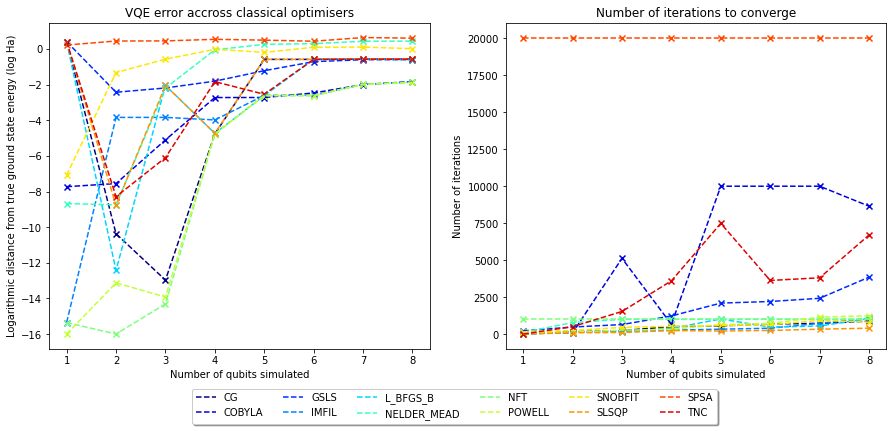

In [88]:
import numpy as np
#optimisers = [IMFIL, NFT, POWELL]
max_sim_q =8
mycolors = [(8/256,133/256,255/256), (125/256,255/256,122/256), (193/256,255/256,54/256)]
X = list(range(1,max_sim_q+1))
from matplotlib import pyplot as plt
fig, axs = plt.subplots(ncols=2, nrows=1, figsize = (15, 6))
for index, opt in enumerate(opt_results.keys()):
    values = np.array(opt_results[opt]['values'])
    target = np.array(opt_results[opt]['target'])
    diff = list(np.log10(values-target))
    for ind2, d in enumerate(diff):
        if np.isnan(d):
            diff[ind2] = -16
    c = plt.cm.jet(index/len(optimisers))
    axs[0].scatter(X, diff, marker='x', color=c)
    axs[0].plot(X, diff, label=opt, ls='--', color=c)
    axs[0].set_xlabel('Number of qubits simulated')
    axs[0].set_ylabel('Logarithmic distance from true ground state energy (log Ha)')
    axs[0].set_title('VQE error accross classical optimisers')
    axs[0].set_xticks(X)
    axs[0].set_yticks(list(range(-16, 1, 2)))
    counts = np.array(opt_results[opt]['counts'])
    axs[1].scatter(X, counts, marker='x', color=c)
    axs[1].plot(X, counts, ls='--', color=c)
    axs[1].set_xlabel('Number of qubits simulated')
    axs[1].set_ylabel('Number of iterations')
    axs[1].set_title('Number of iterations to converge')
    axs[1].set_xticks(X)

fig.legend(loc='lower center',bbox_to_anchor=(0.5, -0.06),
          fancybox=True, shadow=True, ncol=6)

In [89]:
fig.savefig('plots/classical_optimiser_comparison.png', dpi=300, bbox_inches='tight')

In [76]:
opt_results

{'IMFIL': {'counts': [42.0,
   139.33333333333334,
   253.0,
   284.6666666666667,
   377.0],
  'values': [-2.9444817223862323,
   -2.8771207318286742,
   -2.9403151389124953,
   -2.8460431359681437,
   -2.7336616555389686],
  'target': [-3.142824749268175,
   -3.1518728818629786,
   -3.1518728818629795,
   -3.155710388287124,
   -3.1591148519137615]},
 'NFT': {'counts': [1025.0, 1025.0, 1025.0, 1025.0, 1025.0],
  'values': [-2.9277439130694973,
   -2.8274974311971697,
   -2.8904384921080477,
   -2.781405310524594,
   -2.725664526114876],
  'target': [-3.142824749268175,
   -3.1518728818629818,
   -3.151872881862983,
   -3.1557103882871287,
   -3.159114851913748]},
 'POWELL': {'counts': [290.0,
   489.6666666666667,
   1005.3333333333334,
   1094.3333333333333,
   1197.3333333333333],
  'values': [-2.944481722614057,
   -2.8369571716664783,
   -2.909721429048806,
   -2.807584289208206,
   -2.724021451583816],
  'target': [-3.142824749268175,
   -3.15187288186298,
   -3.1518728818629778

In [ ]:
rgb(125,255,122) NFT
rgb(193,255,54) POWELL
rgb(8,133,255) IMFIL